In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")



Libraries imported successfully.


In [ ]:
file_path = '/content/walmartRetailData.xlsx'
data = pd.read_excel(file_path)
print("Dataset loaded successfully:")
print(data.head())

Dataset loaded successfully:
         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport           NaN     Jessica Myrick   Small Business      0.10   
1       Bowie           NaN     Matt Collister      Home Office      0.08   
2        Napa           NaN  Alan Schoenberger        Corporate      0.00   
3  Montebello           NaN  Elizabeth Moffitt         Consumer      0.08   
4        Napa           NaN  Alan Schoenberger        Corporate      0.07   

   Number of Records Order Date  Order ID Order Priority  Order Quantity  ...  \
0                  1 2012-01-01     28774           High              32  ...   
1                  1 2012-01-01     13729  Not Specified               9  ...   
2                  1 2012-01-02     37537            Low               4  ...   
3                  1 2012-01-02     44069       Critical              43  ...   
4                  1 2012-01-02     37537            Low              43  ...   

    Profit Region Row

In [ ]:
selected_columns = ['Customer Segment', 'Order Quantity', 'Sales', 'Profit', 'Region', 'Product Category']
data_subset = data[selected_columns]
print("Selected relevant features:")
print(data_subset.head())


Selected relevant features:
  Customer Segment  Order Quantity    Sales   Profit Region Product Category
0   Small Business              32   180.36  -111.80   East  Office Supplies
1      Home Office               9   872.48  -342.91   East  Office Supplies
2        Corporate               4  1239.06  -193.08   West        Furniture
3         Consumer              43   614.80   247.79   West  Office Supplies
4        Corporate              43  4083.19 -1049.85   West        Furniture


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
data_cleaned = pd.DataFrame(imputer.fit_transform(data_subset), columns=selected_columns)
print("Handled missing values:")
print(data_cleaned.isnull().sum())
print(data_cleaned.head())



Handled missing values:
Customer Segment    0
Order Quantity      0
Sales               0
Profit              0
Region              0
Product Category    0
dtype: int64
  Customer Segment Order Quantity    Sales   Profit Region Product Category
0   Small Business             32   180.36   -111.8   East  Office Supplies
1      Home Office              9   872.48  -342.91   East  Office Supplies
2        Corporate              4  1239.06  -193.08   West        Furniture
3         Consumer             43    614.8   247.79   West  Office Supplies
4        Corporate             43  4083.19 -1049.85   West        Furniture


In [ ]:
label_encoders = {}
categorical_columns = ['Customer Segment', 'Region', 'Product Category']

for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

print("Encoded categorical features:")
print(data_cleaned.head())  # Display the first 5 rows


Encoded categorical features:
   Customer Segment Order Quantity    Sales   Profit  Region  Product Category
0                 3             32   180.36   -111.8       1                 1
1                 2              9   872.48  -342.91       1                 1
2                 1              4  1239.06  -193.08       3                 0
3                 0             43    614.8   247.79       3                 1
4                 1             43  4083.19 -1049.85       3                 0


In [ ]:
scaler = StandardScaler()
numerical_columns = ['Order Quantity', 'Sales', 'Profit']
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

print("Scaled numerical features:")
print(data_cleaned[numerical_columns].head())  # Display the first 5 rows of scaled features


Scaled numerical features:
   Order Quantity     Sales    Profit
0        0.443935 -0.445074 -0.244851
1       -1.144440 -0.252005 -0.437993
2       -1.489739 -0.149747 -0.312778
3        1.203592 -0.323886  0.055663
4        1.203592  0.643631 -1.028792


**K MEANS**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_cleaned)

print("Applied K-Means clustering:")
print(data_cleaned[['Customer Segment', 'Cluster']].head())


NameError: name 'data_cleaned' is not defined

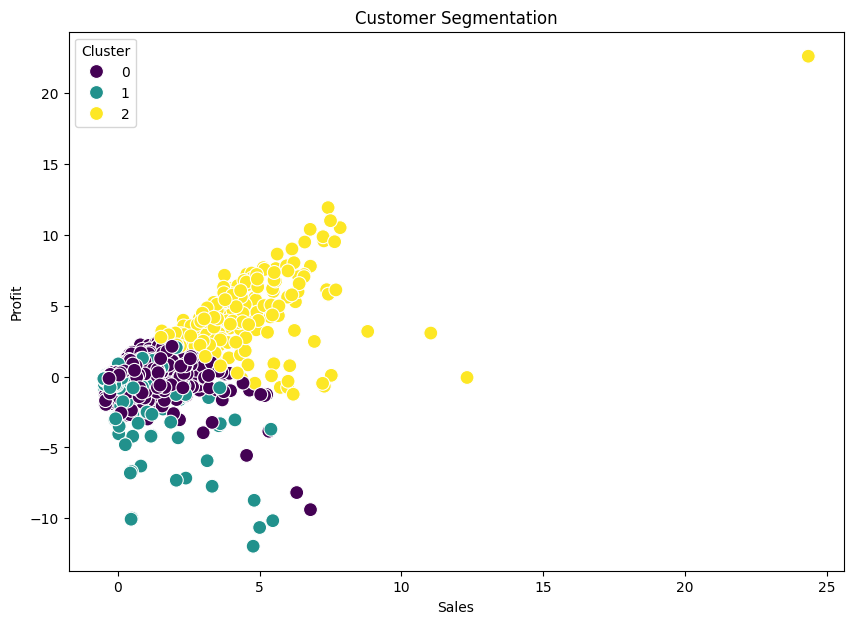

Cluster visualization complete.


In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data_cleaned['Sales'],
    y=data_cleaned['Profit'],
    hue=data_cleaned['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Cluster')
plt.show()
print("Cluster visualization complete.")


**DBSCAN Clustering**

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps and min_samples can be adjusted based on the data
data_cleaned['DBSCAN_Cluster'] = dbscan.fit_predict(data_cleaned[numerical_columns])

print("Applied DBSCAN clustering:")
print(data_cleaned[['Customer Segment', 'DBSCAN_Cluster']].head())  # Display first 5 rows with DBSCAN labels


Applied DBSCAN clustering:
   Customer Segment  DBSCAN_Cluster
0                 3               0
1                 2               0
2                 1               0
3                 0               0
4                 1               0


** Hierarchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Removed affinity parameter
data_cleaned['Hierarchical_Cluster'] = hierarchical.fit_predict(data_cleaned[numerical_columns])

print("Applied Hierarchical clustering:")
print(data_cleaned[['Customer Segment', 'Hierarchical_Cluster']].head())


Applied Hierarchical clustering:
   Customer Segment  Hierarchical_Cluster
0                 3                     0
1                 2                     2
2                 1                     2
3                 0                     0
4                 1                     0


**Visualizing Clusters:**

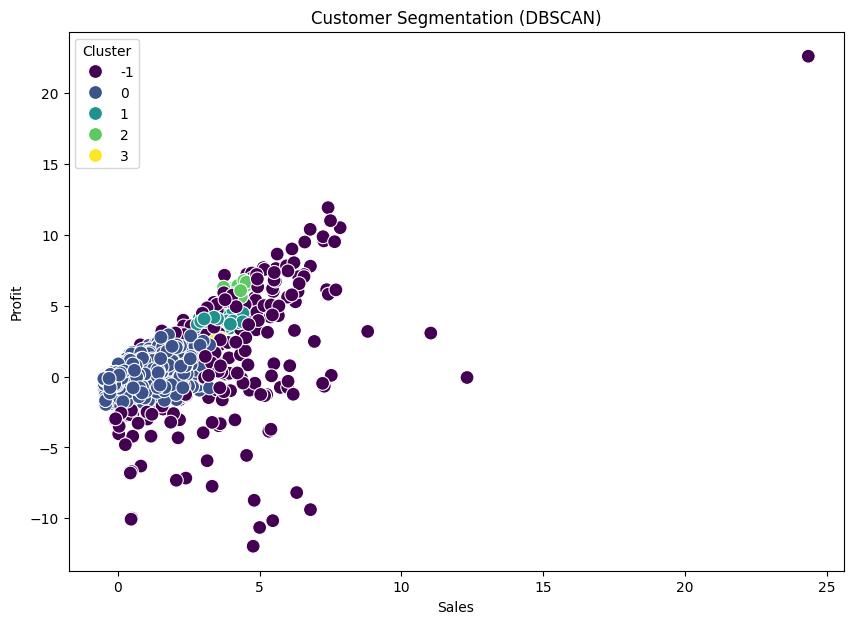

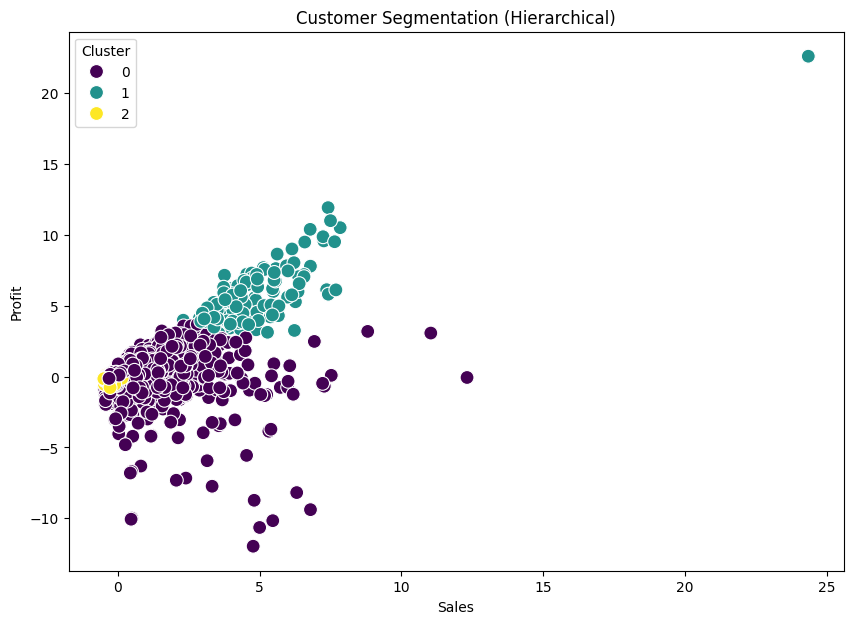

In [ ]:
# Visualization for DBSCAN
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data_cleaned['Sales'],
    y=data_cleaned['Profit'],
    hue=data_cleaned['DBSCAN_Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation (DBSCAN)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Cluster')
plt.show()

# Visualization for Hierarchical Clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data_cleaned['Sales'],
    y=data_cleaned['Profit'],
    hue=data_cleaned['Hierarchical_Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation (Hierarchical)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Cluster')
plt.show()


**Save the Clustered Data:**

In [ ]:
output_file_path_dbscan = 'customer_segmentation_dbscan_output.xlsx'
data_cleaned.to_excel(output_file_path_dbscan, index=False)
print(f"DBSCAN clustered data saved to {output_file_path_dbscan}")

output_file_path_hierarchical = 'customer_segmentation_hierarchical_output.xlsx'
data_cleaned.to_excel(output_file_path_hierarchical, index=False)
print(f"Hierarchical clustered data saved to {output_file_path_hierarchical}")


DBSCAN clustered data saved to customer_segmentation_dbscan_output.xlsx
Hierarchical clustered data saved to customer_segmentation_hierarchical_output.xlsx
